### Import required packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

#### Checking Available Devices build with CUDA for Computing

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

# Image classfication of cifar10 dataset

#### Loading Dataset

In [5]:
cifar = keras.datasets.cifar10.load_data()

#### Train_test_split

In [6]:
(X_train, y_train), (X_test, y_test) = cifar

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

##### Define classes of label

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

###### Visualiization

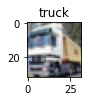

In [11]:
def show_image(index):
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index][0]])
        
show_image(1)        

In [12]:
y_train[0]

array([6], dtype=uint8)

In [13]:
y_train[0]

array([6], dtype=uint8)

##### Preprocessing Data

In [14]:
X_train_scaled = X_train/255   #scaling
X_test_scaled = X_test/255
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype= "float32")
y_test_categorical = keras.utils.to_categorical(y_test, num_classes= 10, dtype="float32")

In [16]:
y_test_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_test_categorical.shape

(10000, 10)

In [18]:
y_train_categorical.shape

(50000, 10)

<h4 style="color:purple">Model building and training</h4>

In [53]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',   # SGD for large dataset
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=34,)

Train on 50000 samples
Epoch 1/34
50000/50000 [==============================] - 10s 208us/sample - loss: 1.8588 - accuracy: 0.3328
Epoch 2/34
50000/50000 [==============================] - 10s 198us/sample - loss: 1.6532 - accuracy: 0.4167
Epoch 3/34
50000/50000 [==============================] - 11s 227us/sample - loss: 1.5658 - accuracy: 0.4469- loss: 1.5 - ETA: 0s - loss: 1.5657 - accuracy
Epoch 4/34
50000/50000 [==============================] - 12s 232us/sample - loss: 1.5040 - accuracy: 0.4713
Epoch 5/34
50000/50000 [==============================] - 11s 211us/sample - loss: 1.4569 - accuracy: 0.4854
Epoch 6/34
50000/50000 [==============================] - 12s 238us/sample - loss: 1.4106 - accuracy: 0.5028
Epoch 7/34
50000/50000 [==============================] - 11s 220us/sample - loss: 1.3744 - accuracy: 0.5153
Epoch 8/34
50000/50000 [==============================] - 12s 230us/sample - loss: 1.3387 - accuracy: 0.5277
Epoch 9/34
50000/50000 [==============================] - 

<h4 style="color:purple">Let's make some predictions</h4>

In [66]:
classes[np.argmax(model.predict(X_test_scaled)[10])]

'airplane'

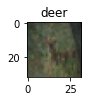

In [67]:
show_image(10)

In [85]:
y_pred= (model.predict(X_train_scaled))
y_pred.shape

y_preda = []
for arr in y_pred:
    classs = classes[np.argmax(arr)]
    y_preda.append(classs)
y_preda[:5]    

['frog', 'truck', 'truck', 'frog', 'automobile']

In [86]:
y_true = []

for arr in y_train:
    y_true.append(classes[arr[0]])
    
y_true[:5]

['frog', 'truck', 'truck', 'deer', 'automobile']

##### Evaluate the model

In [ ]:
model.evaluate(X_train_scaled, y_train_categorical)

#### defing model for device benchmarking

In [106]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

    model.compile(optimizer='SGD',   # SGD for large dataset
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

##### GPU model

In [108]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - ETA: 0s - loss: 1.8576 - accuracy: 0.33 - 9s 171us/sample - loss: 1.8574 - accuracy: 0.3357
11.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


##### CPU model

In [109]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs= 1)
    
    

Train on 50000 samples
50000/50000 [==============================] - 126s 3ms/sample - loss: 1.8589 - accuracy: 0.3347
2min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### cheacking gpu vs cpu performance on 5 epochs

In [111]:
%%timeit -n1 -r1
with tf.device('CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs= 5)
    
cpu_model.predict(X_test_scaled[:5])

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 126s 3ms/sample - loss: 1.8626 - accuracy: 0.3308
Epoch 2/5
50000/50000 [==============================] - 125s 2ms/sample - loss: 1.6584 - accuracy: 0.4118
Epoch 3/5
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.5706 - accuracy: 0.4432
Epoch 4/5
50000/50000 [==============================] - 125s 3ms/sample - loss: 1.5078 - accuracy: 0.4686
Epoch 5/5
50000/50000 [==============================] - 133s 3ms/sample - loss: 1.4555 - accuracy: 0.4881
10min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [120]:
%%timeit -n1 -r1
with tf.device("GPU:0"):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs= 5)
    
gpu_model.predict(X_test_scaled[:5])

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 179us/sample - loss: 1.8610 - accuracy: 0.3364
Epoch 2/5
50000/50000 [==============================] - 10s 205us/sample - loss: 1.6562 - accuracy: 0.4141
Epoch 3/5
50000/50000 [==============================] - 11s 227us/sample - loss: 1.5699 - accuracy: 0.4449
Epoch 4/5
50000/50000 [==============================] - 12s 240us/sample - loss: 1.5094 - accuracy: 0.4683
Epoch 5/5
50000/50000 [==============================] - 12s 243us/sample - loss: 1.4593 - accuracy: 0.4849
57.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## COMPARE

In [122]:
compare = pd.DataFrame([[1, 12, 126],[5, 58, 634]], columns= ["Epochs", "GPU", "CPU"], index= compare["Epochs"])
compare.drop("Epochs", axis= "columns")

,GPU,CPU
Epochs,,
1,12,126
5,58,634


<h1 align= "center", colo>CONCLUSION - CPU is almost 10 times slower then GPU</h1>